C:\Users\srdee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\srdee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\srdee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


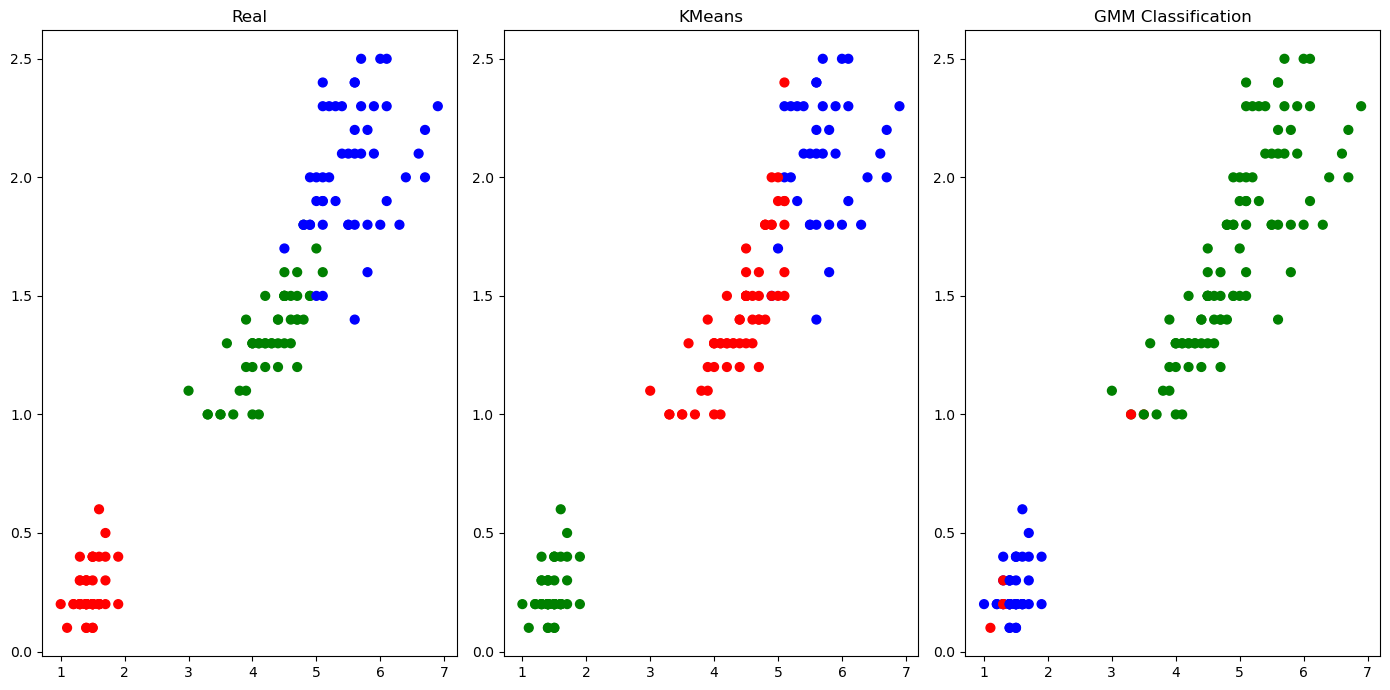

In [2]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datasets = load_iris()
x = pd.DataFrame(datasets.data, columns=['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width'])
y = pd.DataFrame(datasets.target, columns=['Targets'])
colourmap = np.array(['red', 'green', 'blue'])

plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.scatter(x.Petal_length, x.Petal_width, c=colourmap[y.Targets], s=40)
plt.title("Real")

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
predy = np.choose(kmeans.labels_, [0, 1, 2]).astype(np.int64)

plt.subplot(1, 3, 2)
plt.scatter(x.Petal_length, x.Petal_width, c=colourmap[predy], s=40)
plt.title('KMeans')

scaler = preprocessing.StandardScaler()
scaler.fit(x)
xsa = scaler.transform(x)
xs = pd.DataFrame(xsa, columns=x.columns)

gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm = gmm.predict(xs)

plt.subplot(1, 3, 3)
plt.scatter(x.Petal_length, x.Petal_width, c=colourmap[y_cluster_gmm], s=40)
plt.title('GMM Classification')

plt.tight_layout()
plt.show()